# The objective of the experiment is to build a Classifier that Predicts the 'Treatment Group' gieven patients gene expression data along with the patients Clinical data.

In [14]:
import pandas as pd
import numpy as np

In [15]:
neu_data=pd.read_csv('datasets/ProcessedSRDV3_neutrophils.csv')

In [16]:
neu_data.columns

Index(['genes', 'p_val', 'avg_logFC', 'Sample ID', 'outcome', 'Age',
       'Age group', 'Gender', 'FAB subtype', 'Mutation', 'Therapeutic regimen',
       'Treatment group', 'mutations', 'mutations_order'],
      dtype='object')

In [17]:
drop_col_list=[
       'mutations', 'mutations_order'
       ]
neu_data= neu_data.drop(drop_col_list, axis=1)
X_cols = ['genes', 'p_val', 'avg_logFC', 'Sample ID', 'outcome', 'Age',
       'Age group', 'Gender', 'FAB subtype']
y_cols = ['Therapeutic regimen']

In [18]:
neu_data.shape

(11496, 12)

In [19]:
neu_data['Sample ID'].unique()

array(['P03', 'P05', 'P06', 'P07', 'P10', 'P11', 'P16', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P27', 'P30', 'P31',
       'P32', 'P34', 'P35', 'P37', 'P38', 'P39', 'P40', 'P-extra2',
       'P04-Post'], dtype=object)

In [20]:
neu_data.drop_duplicates(inplace=True)

In [21]:
from pycaret.classification import *

In [32]:
train_list = [ 'P07', 'P10', 'P11', 'P16', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P25', 'P27', 'P30', 'P31',
       'P32', 'P34', 'P35', 'P37']
test_list = ['P38', 'P39', 'P40','P03', 'P05', 'P06','P23', 'P24']
unseen_list = ['P-extra2','P04-Post']

In [33]:
data = neu_data.loc[neu_data['Sample ID'].isin(train_list)]
tData = neu_data.loc[neu_data['Sample ID'].isin(test_list)]
data_unseen = neu_data.loc[neu_data['Sample ID'].isin(unseen_list)]

data.reset_index(drop=True, inplace=True)
tData.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [40]:
exp = setup(data = data, 
            test_data = tData,
            target = 'Treatment group', 
            ignore_features = ['Therapeutic regimen','Sample ID','outcome','Age'],
           silent = True,
           html = False,
           fix_imbalance = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,4823
1,Target,Treatment group
2,Target Type,Binary
3,Label Encoded,"IA: 0, IA_DAC/DAC: 1"
4,Original Data,"(2162, 12)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
best = compare_models(include = ['dt','rf','svm'],sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9833,0.9673,0.9345,1.0,0.9514,0.944,0.9531,0.463


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9833,0.9673,0.9345,1.0000,0.9514,0.9440,0.9531,0.463
rf,Random Forest Classifier,0.9361,0.9537,0.9182,0.9086,0.8831,0.8438,0.8664,0.844


/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProect

/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProect

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9833,0.9673,0.9345,1.0000,0.9514,0.9440,0.9531,0.463
svm,SVM - Linear Kernel,0.9787,0.0000,0.9345,0.9846,0.9430,0.9325,0.9422,0.515
rf,Random Forest Classifier,0.9361,0.9537,0.9182,0.9086,0.8831,0.8438,0.8664,0.844


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9833,0.9673,0.9345,1.0000,0.9514,0.9440,0.9531,0.463
svm,SVM - Linear Kernel,0.9787,0.0000,0.9345,0.9846,0.9430,0.9325,0.9422,0.515
rf,Random Forest Classifier,0.9361,0.9537,0.9182,0.9086,0.8831,0.8438,0.8664,0.844


In [42]:
rf_mdl = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8056,1.0000,1.0000,0.5670,0.7237,0.5907,0.6474
5,0.9583,1.0000,0.8364,1.0000,0.9109,0.8840,0.8900
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7639,0.9941,1.0000,0.5189,0.6832,0.5234,0.5954
9,0.8333,0.5433,0.3455,1.0000,0.5135,0.4403,0.5313


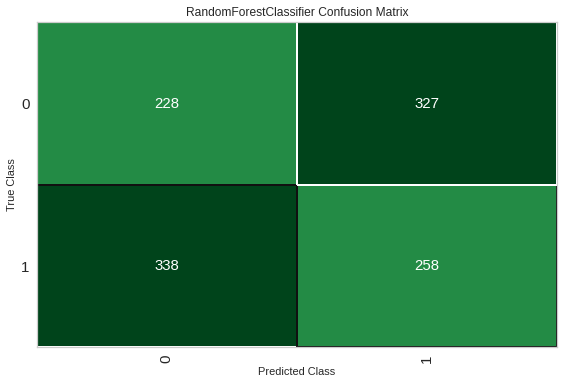

In [43]:
plot_model(rf_mdl, plot = 'confusion_matrix')

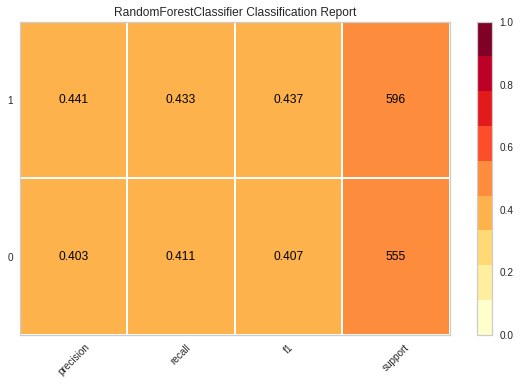

In [44]:
plot_model(rf_mdl, plot = 'class_report')


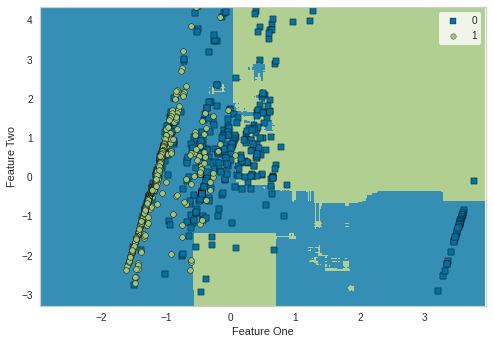

In [45]:
plot_model(rf_mdl, plot='boundary')

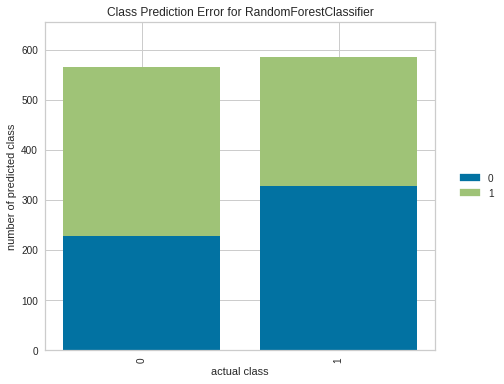

In [46]:
plot_model(rf_mdl, plot = 'error')

In [47]:
unseen_predictions = predict_model(rf_mdl, data=data_unseen)
unseen_predictions

,genes,p_val,avg_logFC,Sample ID,outcome,Age,Age group,Gender,FAB subtype,Mutation,Therapeutic regimen,Treatment group,Label,Score
0,IGLC3,2.961648e-31,4.568750,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.69
1,IGLC2,1.054148e-22,4.442563,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.65
2,IGHG4,3.985027e-28,4.413368,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.65
3,IGHG1,4.593343e-31,4.175833,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.69
4,IGLL5,1.471529e-17,4.070220,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TMED10,2.740085e-03,0.355618,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA,0.52
144,RPN2,3.375320e-03,0.352146,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.55
145,ZNF706,1.704009e-03,0.343940,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.56
146,KRTCAP2,1.048265e-03,0.312033,P-extra2,remission,66,o,F,M2,"IDH2, DNMT3A",DAC,IA_DAC/DAC,IA_DAC/DAC,0.51


/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonProects/UAB/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rahul/pythonP